## ЗАДАНИЕ №2


In [20]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import math
from sklearn.utils import resample

### Генерируем выборку и формируем вариационный ряд

In [21]:
n = 25  
sample = st.expon.rvs(loc=0, scale=1, size=n)  
var_series = np.sort(sample)  

### a)
#### Определить по выборке моду, медиану, размах, оценку коэффициента асимметрии

In [22]:
# считаем моду
elements, counts = np.unique(sample, return_counts=True)
if len(elements) == n:
    moda = sample
else:
    moda = elements[np.argmax(counts)]

print('Мода : ', moda)

# находим медиану
mediana = var_series[12]
print('Медиана : ', mediana)

# находим размах
razmah = np.max(sample) - np.min(sample)
print('Разамах : ', razmah)

# оцениваем коэффициент асимметрии
sample_minus_aver = sample - 1/n * np.sum(sample)
m_2 = 1/n * np.sum(sample_minus_aver * sample_minus_aver)
m_3 = 1/n * np.sum(sample_minus_aver *
                   sample_minus_aver * sample_minus_aver)
gamma = (m_3 / m_2 ** (3 / 2))
print('Коэффициент ассиметрии : ', gamma)

Мода :  [0.94425565 0.67870489 0.62547665 0.26792473 0.61860641 0.6099995
 0.69409592 1.51052338 0.34255622 1.91679936 0.18116966 1.13902607
 1.11660862 0.12383352 0.20776558 0.6801862  2.89109864 0.43220803
 0.12967273 4.04282452 1.00331229 0.26779373 0.10630906 1.42005022
 0.38686764]
Медиана :  0.6254766466059306
Разамах :  3.936515454441668
Коэффициент ассиметрии :  2.038431414798839


### b)
#### Построить эмпирическую функцию распределения, гистограмму и boxplot

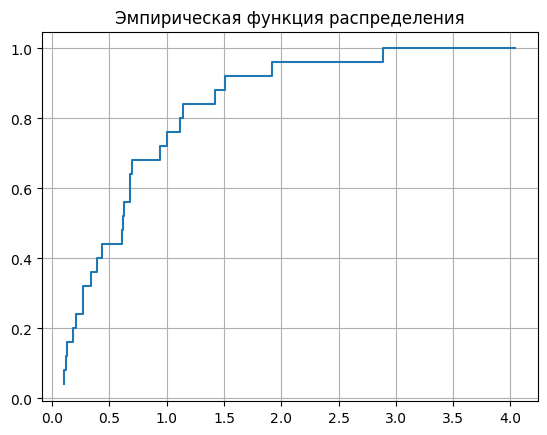

In [23]:
# строим эмпирическую функцию
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y


x, y = ecdf(var_series)

plt.step(x, y)
plt.title('Эмпирическая функция распределения')
plt.grid(True)
plt.show()

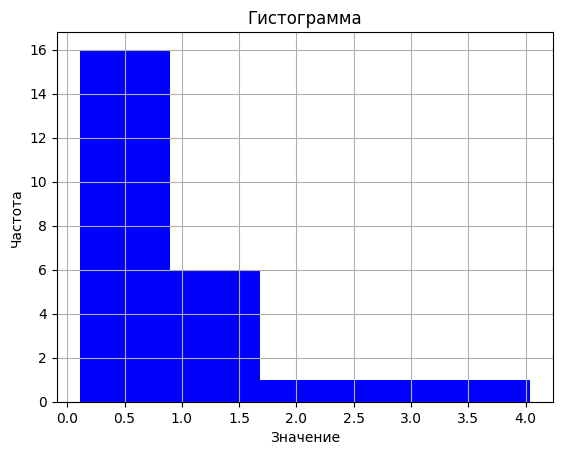

In [24]:
# строим гистограму
k = int(1 + np.log2(n))

plt.hist(sample, bins=k, orientation='vertical', color='blue')
plt.xlabel('Значение')
plt.title('Гистограмма')
plt.grid(True)
plt.ylabel('Частота')
plt.show()

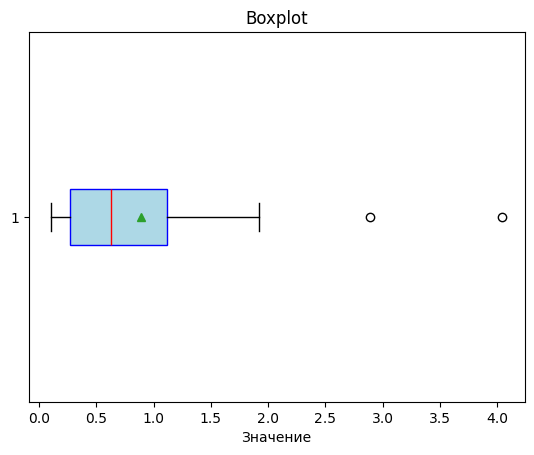

In [25]:
# строим boxplot
plt.boxplot(sample,
            vert=False,  # Горизонтальный boxplot
            showmeans=True,  # Отображение среднего
            showfliers=True,  # Не показывать выбросы
            patch_artist=True,  # Для заполнения цветом коробки
            boxprops=dict(facecolor="lightblue", color="blue"),  # Цвет коробки
            medianprops=dict(color="red"))  # Цвет медианы
plt.xlabel('Значение')
plt.title('Boxplot')
plt.show()

## с)
### Сравнить оценку плотности распределения среднего арифметического элементов выборки, полученную с помощью ЦПТ, с бутстраповской оценкой этой плотности

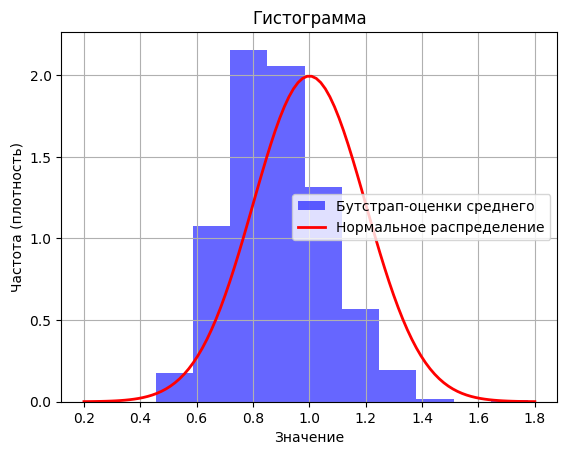

In [26]:
# заводим массив средних значений
aver_list = []

for _ in range(1000):
    indices = np.random.choice(n, size=n, replace=True)
    bootstrap_sample = sample[indices]
    aver_list.append(np.average(bootstrap_sample))

k_aver = int(1 + np.log2(1000))

mu = 1
sigma = 1/5
norm_dist = st.norm(loc=mu, scale=sigma)

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

pdf = norm_dist.pdf(x)

plt.hist(aver_list, bins=k_aver, density=True, alpha=0.6, color='blue',
         label='Бутстрап-оценки среднего')
plt.plot(x, pdf, 'r', linewidth=2, label='Нормальное распределение')

plt.xlabel('Значение')
plt.title('Гистограмма')
plt.grid(True)
plt.ylabel('Частота (плотность)')
plt.legend()
plt.show()

## d)
### Найти бутстраповскую оценку плотности распределения коэффициента асимметрии и оценить вероятность того, что коэффициент асимметрии будет меньше 1

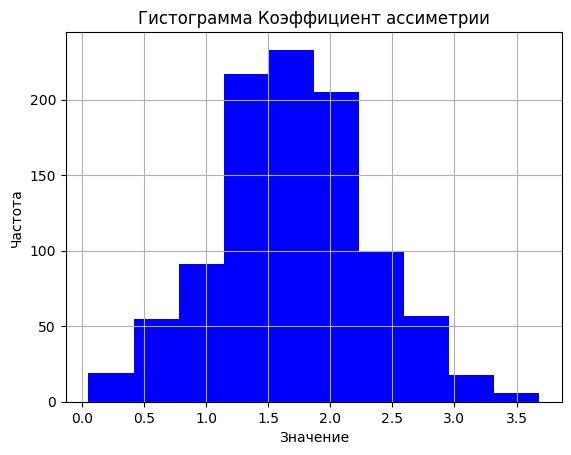

Вероятность того, что коэффициент асимметрии будет меньше 1 :  0.122


In [27]:
koeff_list = []

for _ in range(1000):
    indices = np.random.choice(n, size=n, replace=True)
    bootstrap_sample = sample[indices]
    sample_minus_aver = bootstrap_sample - 1/n * np.sum(bootstrap_sample)
    m_2 = 1/n * np.sum(sample_minus_aver * sample_minus_aver)
    m_3 = 1/n * np.sum(sample_minus_aver *
                       sample_minus_aver * sample_minus_aver)
    gamma = (m_3 / m_2 ** (3 / 2))
    koeff_list.append(gamma)

k_koeff = int(1 + np.log2(1000))

plt.hist(koeff_list, bins=k_koeff, orientation='vertical', color='blue')
plt.xlabel('Значение')
plt.title('Гистограмма Коэффициент ассиметрии')
plt.grid(True)
plt.ylabel('Частота')
plt.show()

koeff_list = np.array(koeff_list)
less_than_one = np.count_nonzero(koeff_list < 1)
p_less_than_one = less_than_one/1000
print('Вероятность того, что коэффициент асимметрии будет меньше 1 : ', p_less_than_one)

## e)
### Сравнить плотность распределения медианы выборки с бутстраповской оценкой этой плотности

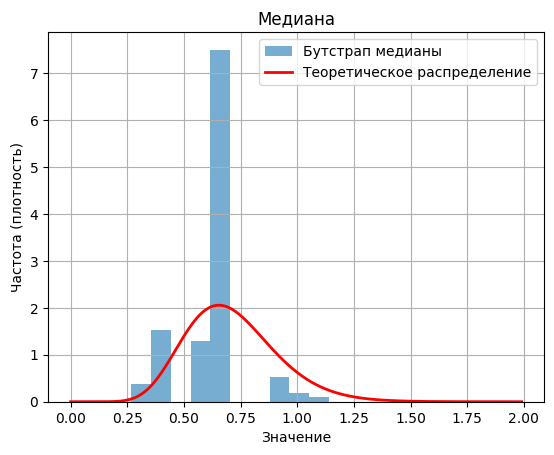

In [28]:
med_list = []

for _ in range(1000):
    indices = np.random.choice(n, size=n, replace=True)
    bootstrap_sample = sample[indices]
    bootstrap_mediana = np.sort(bootstrap_sample)[12]
    med_list.append(bootstrap_mediana)

k_med = int(1 + np.log2(1000))

# строим распределение медианы
k = 13
x = []
y = []

for t in np.arange(0, 2, 0.01):
    x.append(t)
    yi = (np.e**(-t) * n * (math.factorial(n - 1) /
          (math.factorial(n - k) * math.factorial(k - 1))) * (np.e**(-t))**(n - k) * (1 - np.e**(-t)) ** (k - 1))
    y.append(yi)


fig, ax = plt.subplots()
ax.hist(med_list, bins=k_med, density=True, orientation='vertical',
        label='Бутстрап медианы', alpha=0.6)
ax.plot(x, y, 'r-', linewidth=2, label='Теоретическое распределение')

ax.set_xlabel('Значение')
ax.set_ylabel('Частота (плотность)')
ax.set_title('Медиана')
ax.grid(True)
ax.legend()

plt.show()